In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('tree_data_04_51_20_June_17_2018.csv')
df.head()

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


,density,max degree,order,diameter,radius,returned burning sequence length
0,0.026667,5.0,75.0,23.0,12.0,8.0
1,0.020202,6.0,99.0,39.0,20.0,9.0
2,0.018692,6.0,107.0,20.0,10.0,8.0
3,0.022989,5.0,87.0,24.0,12.0,9.0
4,0.285714,3.0,7.0,5.0,3.0,3.0


In [2]:
len(df)

500000

In [3]:
df_large_trees = pd.read_csv('tree_data_10_02_22_June_17_2018.csv')
print(len(df_large_trees))
df_large_trees.head()

100000


,density,max degree,order,diameter,radius,returned burning sequence length
0,0.010050,6.0,199.0,55.0,28.0,11.0
1,0.010870,6.0,184.0,29.0,15.0,10.0
2,0.015504,7.0,129.0,32.0,16.0,8.0
3,0.020408,5.0,98.0,29.0,15.0,9.0
4,0.027778,6.0,72.0,24.0,12.0,7.0


In [4]:
df_combined = df.append(df_large_trees)
df_combined = df_combined.drop_duplicates()
len(df_combined)

40905

### Correlations
- Negative correlation with density: as a graph gets more dense, it is burned faster.
- Positive correlations with radius, diameter, and order: as a graph gets wider/larger, it takes longer to burn.
- Weak correlation with max degree

In [5]:
correlations = df_combined.corr()['returned burning sequence length'].sort_values()
print(correlations)

density                            -0.717548
max degree                          0.116024
radius                              0.728303
diameter                            0.729076
order                               0.876738
returned burning sequence length    1.000000
Name: returned burning sequence length, dtype: float64


Text(0,0.5,'Count')

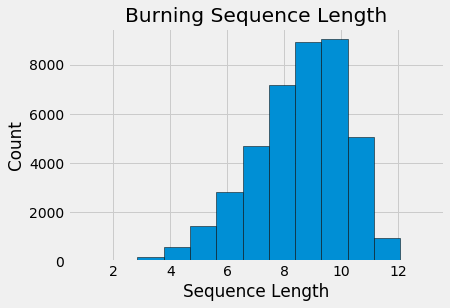

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

# Plot distribution of burning sequence length
plt.hist(df_combined['returned burning sequence length'], edgecolor='k', bins=13)
plt.title('Burning Sequence Length')
plt.xlabel('Sequence Length')
plt.ylabel('Count')

In [12]:
# Look at relationship between tree order and the length of the returned burning sequence
order_data = df_combined[['order', 'returned burning sequence length']]
order_data['sqrt(n)'] = np.ceil(np.sqrt(order_data['order']))
order_data.head()

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,order,returned burning sequence length,sqrt(n)
0,75.0,8.0,9.0
1,99.0,9.0,10.0
2,107.0,8.0,11.0
3,87.0,9.0,10.0
4,7.0,3.0,3.0


In [27]:
order_data['binned_length'] = pd.cut(order_data['sqrt(n)'], bins=[i for i in range(1, 16)])
order_data.head()

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,order,returned burning sequence length,sqrt(n),binned_length
0,75.0,8.0,9.0,"(8, 9]"
1,99.0,9.0,10.0,"(9, 10]"
2,107.0,8.0,11.0,"(10, 11]"
3,87.0,9.0,10.0,"(9, 10]"
4,7.0,3.0,3.0,"(2, 3]"


In [28]:
# Group by bin
length_groups = order_data.groupby('binned_length').mean()

# Shows average length of returned burning sequence wrt ceil(sqrt(n))
length_groups

,order,returned burning sequence length,sqrt(n)
binned_length,,,
"(1, 2]",3.250000,2.000000,2.0
"(2, 3]",7.644444,2.888889,3.0
"(3, 4]",13.498233,3.660777,4.0
"(4, 5]",21.396333,4.576869,5.0
"(5, 6]",31.211978,5.356974,6.0
"(6, 7]",43.104941,6.075395,7.0
"(7, 8]",57.337455,6.824364,8.0
"(8, 9]",73.184002,7.498771,9.0
"(9, 10]",91.290943,8.140556,10.0


Text(0.5,1,'Average Sequence Length vs. sqrt(n)')

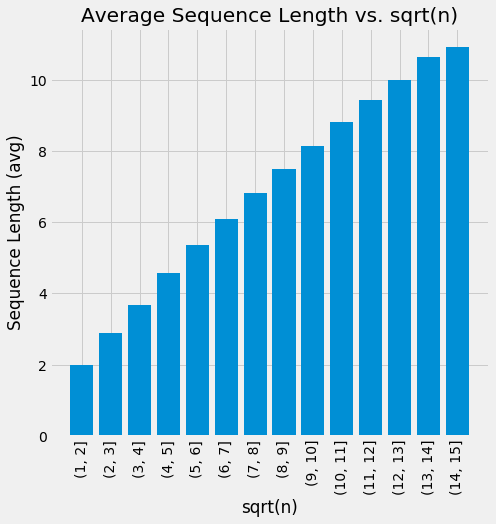

In [31]:
# Plot sequence length
plt.figure(figsize=(7, 7))
plt.bar(length_groups.index.astype(str), length_groups['returned burning sequence length'])

# Labels
plt.xticks(rotation=90)
plt.xlabel('sqrt(n)')
plt.ylabel('Sequence Length (avg)')
plt.title('Average Sequence Length vs. sqrt(n)')

In [14]:
from random import randint
import networkx as nx
from burn_tree import *
import math

#print('{0:23} | {1:13} | {2:3}'.format("Burning Sequence Length", "ceil(sqrt(n))", "n"))
for i in range(1):
    n = randint(1, 150)
    rand_tree = nx.generators.trees.random_tree(n, seed=randint(0, 213218321321))

    burning_sequence, num_marked = burn_tree(rand_tree, 0)
    upper_bound = math.ceil(math.sqrt(rand_tree.order()))

    print('{0:10} | {1:25} | {2:20}'.format("Iteration", "Lower Bound (Hopefully)", "Number Actually Marked"))
    lower_bound = 0
    actual_marked = 0
    for i in range(len(burning_sequence)):
        lower_bound += 2 * i + 1
        actual_marked += num_marked[i]
        print('{0:10d} | {1:25d} | {2:20d}'.format(i, lower_bound, actual_marked))
        

Iteration  | Lower Bound (Hopefully)   | Number Actually Marked
         0 |                         1 |                    1
         1 |                         4 |                    6
         2 |                         9 |                   12
         3 |                        16 |                   26
         4 |                        25 |                   51
         5 |                        36 |                   66
         6 |                        49 |                   99
